In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import yaml
from operator import itemgetter
import pandas as pd
import os

import figures

# Diagram n=3

In [6]:
folder = "/home/lasbleis-m/Research/output_mush/diag_random_n3_all/"
data_n3 = figures.diagram_data(folder, "diag_random.csv")

Looking through folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all/
oups, not a folder: /home/lasbleis-m/Research/output_mush/diag_random_n3_all//data.csv
oups, not a folder: /home/lasbleis-m/Research/output_mush/diag_random_n3_all//diag_random.csv


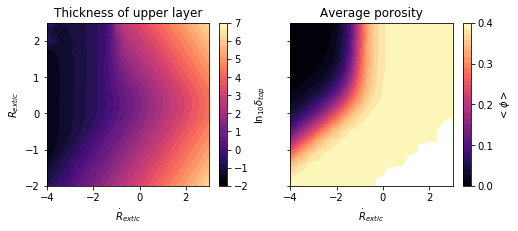

In [7]:
figures.diagram(data_n3)  

# N=3 and exp=0.5

Looking through folder /home/lasbleis-m/Research/output_mush/diag_exp03_n3/
no boundary for R 0.0009894954886609613, dot_R 929.3893254610364: folder /home/lasbleis-m/Research/output_mush/diag_exp03_n3//exp_5.00e-01_coeff_9.29e+02_radius_9.89e-04
no boundary for R 0.010235859092016372, dot_R 556.3461127012912: folder /home/lasbleis-m/Research/output_mush/diag_exp03_n3//exp_5.00e-01_coeff_5.56e+02_radius_1.02e-02
no boundary for R 0.0009310349489990877, dot_R 24.2990836189467: folder /home/lasbleis-m/Research/output_mush/diag_exp03_n3//exp_5.00e-01_coeff_2.43e+01_radius_9.31e-04
no boundary for R 0.0010547617676316475, dot_R 289.2267688802707: folder /home/lasbleis-m/Research/output_mush/diag_exp03_n3//exp_5.00e-01_coeff_2.89e+02_radius_1.05e-03
no boundary for R 0.008176945233018967, dot_R 302.7066695006306: folder /home/lasbleis-m/Research/output_mush/diag_exp03_n3//exp_5.00e-01_coeff_3.03e+02_radius_8.18e-03
no boundary for R 0.002231037675177518, dot_R 96.45035264920102: folder /home

/home/lasbleis-m/Research/mush/figures.py:371: RuntimeWarning: invalid value encountered in log
  delta = np.log(np.array(df["delta"].values).astype(float))/np.log(10.)


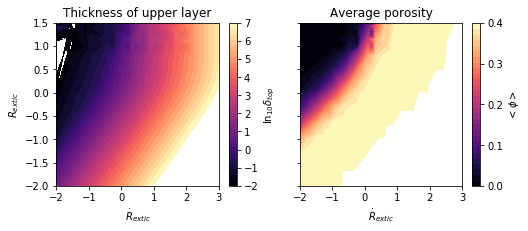

In [5]:
folder = "/home/lasbleis-m/Research/output_mush/diag_exp03_n3/"
data_n3 = figures.diagram_data(folder, "diag_random.csv")
figures.diagram(data_n3, ylim=[-2, 1.5], xlim=[-2, 3])  

# comparison final state n=2 or n=3

In [ ]:
folder_base = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/comparaison_n2_n3/"

folders = os.listdir(folder_base)
folders = [x  for x  in folders if x[0]=="n"]
fig2, ax2 = plt.subplots(figsize=[6,6])


pvalues = [0, -1, -2, -3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
                
        try:
            n = options["n"]
        except KeyError:
            n = 2
          
        val = np.log10(options["coeff_velocity"])
        if n == 2: 
            ligne = "-"
            legend = "$\dot R_i$ : {}".format(options["coeff_velocity"])
        else: 
            ligne = "--"
            legend = ""
        
        
        colors = plt.cm.viridis(norm(val))
        name_max = max(timesteps.items(), key=itemgetter(1))[0]
        data = pd.read_csv(name_max, sep=" ")
        dr = data["radius"][1]-data["radius"][0]
        ax2.plot((data["radius"] + dr / 2.)/options["Ric_adim"], data["porosity"], ligne, color=colors, label=legend)
        
        stat = pd.read_csv(file_stat, sep=" ", index_col=False)
        stat = stat["thickness_boundary"]
        print("{}, {}".format(n, options["coeff_velocity"]))
        print("delta is {}".format(stat.tail(1).item()))

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 0.4])
ax2.set_ylabel("Porosity")
ax2.set_xlabel("Radius")
ax2.legend(loc=2)




# No growth

/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


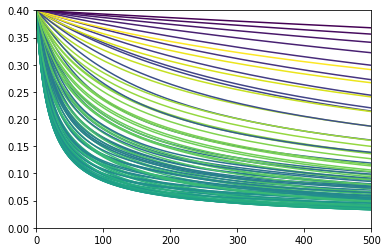

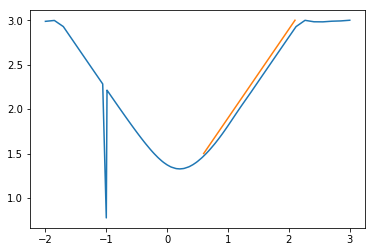

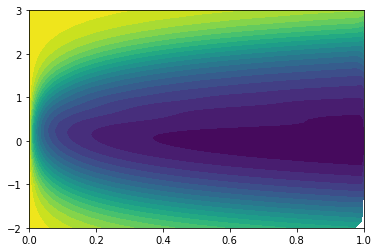

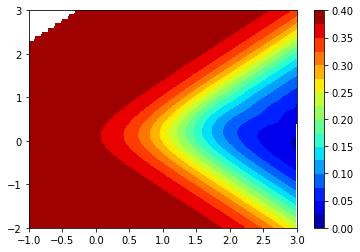

In [5]:
folder_base = "/home/lasbleis-m/Research/output_mush/no_growth_n3/"
folders = os.listdir(folder_base)

fig, ax = plt.subplots()

columns = ["Ric_adim", "time"]
df = pd.DataFrame(columns=columns)

columns = ["Ric_adim", "sum_phi", "time"]
data_all = pd.DataFrame(columns=columns)

def add_value(df, ric, time):
        df_add = pd.DataFrame({"Ric_adim":[ric], "time": time})
        df = df.append(df_add)
        return df

pvalues = [-2, 3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
        val = np.log10(options["Ric_adim"])
        co = plt.cm.viridis(norm(val))
        data = pd.read_csv(file_stat, sep=" ", index_col=False)
        ax.plot(data['time'], data["sum_phi"], color=co)
        
        save_data = data[["time", "sum_phi"]].copy()
        save_data["Ric_adim"] = options["Ric_adim"]
        data_all = data_all.append(save_data)
        
        data["phi0.3"] =  np.abs(data["sum_phi"]-0.2)
        time = data["time"].iloc[data["phi0.3"].idxmin()]
        
        df = add_value(df, options["Ric_adim"], time)
        
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.4])

fig, ax = plt.subplots()
df.sort_values(by="Ric_adim",  inplace=True)
ax.plot(np.log10(df["Ric_adim"]), np.log10(df["time"]))
ax.plot([0.6, 2.1], [1.5, 3.])


fig, ax = plt.subplots()
data_all = data_all[data_all["time"]>0.]
time = data_all["time"].values
Ric = data_all["Ric_adim"].values
phi = data_all["sum_phi"].values
ax.tricontourf(time/1000, np.log10(Ric), phi, 20)
#ax.plot(time, np.log10(Ric),'.')


# if needed to use log time
fig, ax =plt.subplots()
xi = np.linspace(-1, 3., 200)
yi = np.linspace(-2, 3., 50)
from scipy.interpolate import griddata
#zi = griddata(time, np.log10(Ric), phi, xi, yi, interp='linear')
zi = griddata((np.log10(time), np.log10(Ric)), phi, (xi[None,:], yi[:,None]), method='cubic')
sc = ax.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
fig.colorbar(sc)



# Profiles pf evolution for supercooling: 

- R = 1e-1
- R = 10
- R = 100

In [6]:
def extract_files(subfolder):
        list_files = os.listdir(subfolder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = subfolder + "/" + file
            elif file[-9:] == ".timestep":
                _name = subfolder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                with open(subfolder + "/" + file, 'r') as stream:
                    try:
                        param = yaml.safe_load(stream)
                        #print(param)
                    except yaml.YAMLError as exc:
                        print(exc)
        return file_stat, param, timesteps
from operator import itemgetter

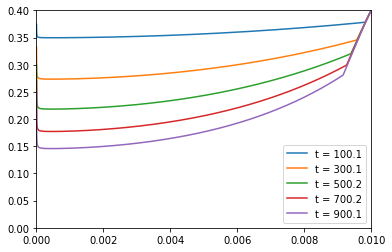

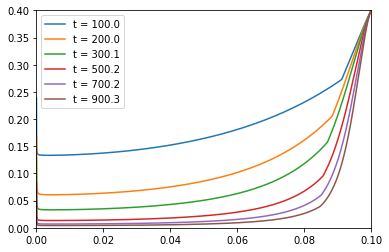

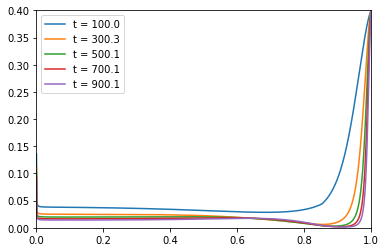

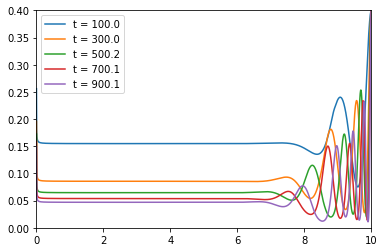

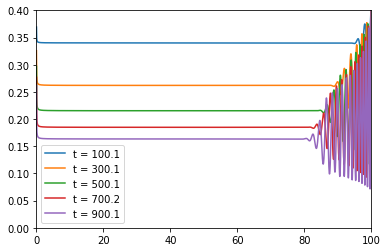

In [7]:
folders = ["/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e-02",
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e-01", 
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e+00", 
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e+01",
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e+02"
           ]

for folder in folders:
    fig, ax = plt.subplots()
    file_stat, param, timesteps = extract_files(folder)
    #print(timesteps)
    for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
        data = pd.read_csv(name, sep=" ")
        #Porosity = np.array(data["porosity"].values)
        #N_r = len(Porosity)
        dr = data["radius"][1]-data["radius"][0]
        if i%2==0: ax.plot(data["radius"] + dr / 2., data["porosity"], label="t = {:.1f}".format(time))
    ax.set_ylim([0, 0.4])
    ax.set_xlim([0., data["radius"].iloc[-1]+dr/2])
    ax.legend()
    

# Supercooling 

In [10]:
folder = "/home/lasbleis-m/Research/output_mush/supercooling_4/"

def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], "sum_phi":[phi], "delta":[delta], "r0_supercooling":[r0_supercooling]})
    df = df.append(df_add, ignore_index=True)
    return df

list_subfolder = os.listdir(folder)
print("Looking through folder {}".format(folder))

columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling"]
df = pd.DataFrame(columns=columns)

for subfolder_name in list_subfolder:
            if os.path.isdir(folder + "/" + subfolder_name):
                list_files = os.listdir(folder+"/"+subfolder_name)
                for file in list_files:
                    if file[-14:] == "statistics.txt":
                        file_stat = folder + "/" + subfolder_name + "/" + file
                    if file[-5:] == ".yaml":
                        with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                            try:
                                param = yaml.safe_load(stream)
                                #print(param)
                            except yaml.YAMLError as exc:
                                print(exc)
                data = pd.read_csv(file_stat, sep=" ", index_col=False)
                if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                    remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                else:
                    remarks = ""
                remarks=remarks+subfolder_name
                if data["thickness_boundary"].iloc[-1] < 1e-12:
                    pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                            data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], param["r0_supercooling"])
            else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
df.to_csv(folder+"data.csv")

df = df.sort_values(by=["Ric_adim", 'coeff_velocity', "sum_phi"]).reset_index(drop=True)

#print(df[df["sum_phi"]<0.3])



Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_4/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_4//data.csv


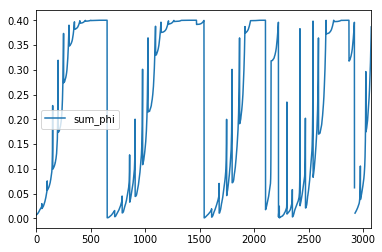

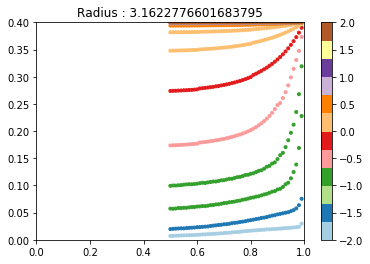

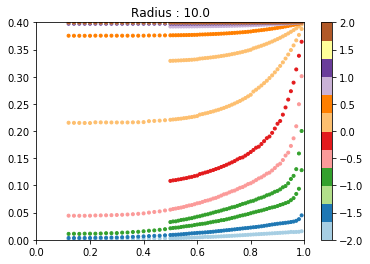

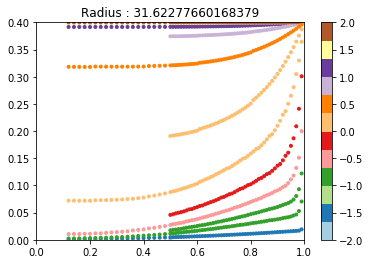

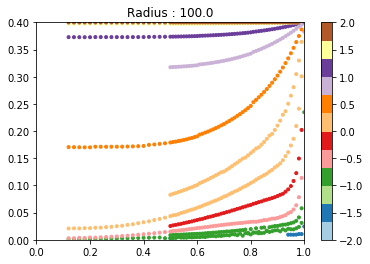

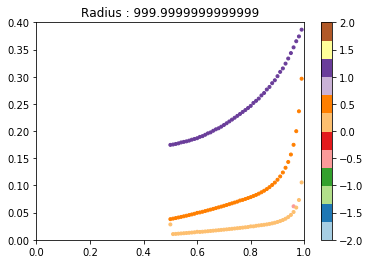

In [11]:
df.plot(y="sum_phi", use_index=True)
error=1e-12

def select_unique(dataframe):
    values = dataframe.unique()
    keep_values = np.abs(np.diff(values))>error
    keep_values = np.insert(keep_values,0,True)
    return values[keep_values]

coeff_1 = df[df["Ric_adim"]==100.]
coeff_01 = df[df["Ric_adim"]==10**1.5]
coeff_10 = df[df["Ric_adim"]==10.]


#markers = ["x", "v","^"]
# fig, ax = plt.subplots()

radii = select_unique(df["Ric_adim"])

for radius in (radii):
    values = df[np.abs(df["Ric_adim"]-radius)<error]
    fig, ax = plt.subplots()
    sc = ax.scatter(values["r0_supercooling"]/values["Ric_adim"], values["sum_phi"], 
               c= np.log10(values['coeff_velocity']), 
               marker='.', vmin=-2, vmax=2, cmap=plt.cm.get_cmap("Paired"))
    fig.colorbar(sc)
    ax.set_ylim([0, 0.4])
    ax.set_xlim([0, 1])
    ax.set_title("Radius : {}".format(radius))